In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats
import scipy.signal


file_path = r'D:\Stations_data\Bani\all_months_copy'
os.chdir(file_path)

In [44]:
df1 = pd.read_csv('till_january.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)

df3 = pd.read_csv('Temp_Rain_Bani.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()

In [45]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-13') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-13') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-13') & (df3_1hr.index < '2020-04-17')

# Monsoon
date_mask1 = (df1_1hr.index >= '2020-07-01') & (df1_1hr.index < '2020-07-07')
date_mask2 = (df2_1hr.index >= '2020-07-01') & (df2_1hr.index < '2020-07-07')
date_mask3 = (df3_1hr.index >= '2020-07-01') & (df3_1hr.index < '2020-07-07')

# # Post-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-10-08') & (df1_1hr.index < '2020-10-14')
# date_mask2 = (df2_1hr.index >= '2020-10-08') & (df2_1hr.index < '2020-10-14')
# date_mask3 = (df3_1hr.index >= '2020-10-08') & (df3_1hr.index < '2020-10-14')

# # Winter
# date_mask1 = (df1_1hr.index >= '2020-12-20') & (df1_1hr.index < '2020-12-26')
# date_mask2 = (df2_1hr.index >= '2020-12-20') & (df2_1hr.index < '2020-12-26')
# date_mask3 = (df3_1hr.index >= '2020-12-20') & (df3_1hr.index < '2020-12-26')

In [46]:
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

In [47]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')

In [48]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('############ Sensor - 1 ############')
S1_SM = SM_sensor1
result_S1_SM = adfuller(S1_SM)
print('ADF Statistics: %f' % result_S1_SM[0])
print('p-value: %f' % result_S1_SM[1])
print('Critical Values:')
for key, value in result_S1_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_SM[0] < result_S1_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-2 Soil Moisture
print('############ Sensor - 5 ############')
# S5_SM = SM_sensor5
# result_S5_SM = adfuller(S5_SM)
# print('ADF Statistics: %f' % result_S5_SM[0])
# print('p-value: %f' % result_S5_SM[1])
# print('Critical Values:')
# for key, value in result_S5_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_SM[0] < result_S5_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

# Null - Hypothesis test for Sensor-7 Soil Moisture
print('############ Sensor - 7 ############')
# S7_SM = SM_sensor7
# result_S7_SM = adfuller(S7_SM)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-9 Soil Moisture
print('############ Sensor - 9 ############')
# S9_SM = SM_sensor9
# result_S9_SM = adfuller(S9_SM)
# print('ADF Statistics: %f' % result_S9_SM[0])
# print('p-value: %f' % result_S9_SM[1])
# print('Critical Values:')
# for key, value in result_S9_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_SM[0] < result_S9_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -0.586807
p-value: 0.873935
Critical Values:
	1%: -3.478
	5%: -2.882
	10%: -2.578
Failed to Reject Ho - Time Series is Non-Stationary
############ Sensor - 5 ############
############ Sensor - 7 ############
############ Sensor - 9 ############


In [49]:
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST = ST_sensor1.values
result_S1_ST = adfuller(S1_ST)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-5 Soil Moisture
print('############ Sensor - 5 ############')
# S5_ST = ST_sensor5.values
# result_S5_ST = adfuller(S5_ST)
# print('ADF Statistics: %f' % result_S5_ST[0])
# print('p-value: %f' % result_S5_ST[1])
# print('Critical Values:')
# for key, value in result_S5_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_ST[0] < result_S5_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-7 Soil Moisture
print('############ Sensor - 7 ############')
# S7_ST = ST_sensor7.values
# result_S7_ST = adfuller(S7_ST)
# print('ADF Statistics: %f' % result_S7_ST[0])
# print('p-value: %f' % result_S7_ST[1])
# print('Critical Values:')
# for key, value in result_S7_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_ST[0] < result_S7_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-9 Soil Moisture
print('############ Sensor - 9 ############')
# S9_ST = ST_sensor9.values
# result_S9_ST = adfuller(S9_ST)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -2.642929
p-value: 0.084445
Critical Values:
	1%: -3.478
	5%: -2.883
	10%: -2.578
Failed to Reject Ho - Time Series is Non-Stationary
############ Sensor - 5 ############
############ Sensor - 7 ############
############ Sensor - 9 ############


In [50]:
## Stationarity check after first order differencing

In [51]:
# Differencing to make the Non-stationary time-series into stationaty

# def differncing ():
#     for i in 
print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')

S1_SM_Diff = np.diff(SM_sensor1)
# plt.plot(S1_SM_Diff)
len(S1_SM_Diff)

# S1_SM = SM_sensor1.values
result_S1_SM = adfuller(S1_SM_Diff)
print('ADF Statistics: %f' % result_S1_SM[0])
print('p-value: %f' % result_S1_SM[1])
print('Critical Values:')
for key, value in result_S1_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_SM[0] < result_S1_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 5 ############')

# S5_SM_Diff = np.diff(SM_sensor5)
# len(S5_SM_Diff)

# # S1_SM = SM_sensor1.values
# result_S5_SM = adfuller(S5_SM_Diff)
# print('ADF Statistics: %f' % result_S5_SM[0])
# print('p-value: %f' % result_S5_SM[1])
# print('Critical Values:')
# for key, value in result_S5_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_SM[0] < result_S5_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
print('############ Sensor - 7 ############')

# S7_SM_Diff = np.diff(SM_sensor7)
# len(S7_SM_Diff)

# # S7_SM = SM_sensor1.values
# result_S7_SM = adfuller(S7_SM_Diff)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

    
print('############ Sensor - 9 ############')

# S9_SM_Diff = np.diff(SM_sensor9)
# len(S9_SM_Diff)

# S1_SM = SM_sensor1.values
# result_S9_SM = adfuller(S9_SM_Diff)
# print('ADF Statistics: %f' % result_S9_SM[0])
# print('p-value: %f' % result_S9_SM[1])
# print('Critical Values:')
# for key, value in result_S9_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_SM[0] < result_S9_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    

    
# fig, ax = plt.subplots(3, 2, figsize = (9*2, 4*2.3), dpi = 300)

# ax[0,0].plot(S1_SM_Diff, 'green', label = 'SM after differencing')
# ax[0,0].set(title='S1', ylabel = 'soil moisture')

# ax[0,1].plot(S5_SM_Diff, 'green')
# ax[0,1].set(title='S5', ylabel = 'soil moisture')

# ax[1,0].plot(S6_SM_Diff, 'green')
# ax[1,0].set(title='S6', ylabel = 'soil moisture')

# ax[1,1].plot(S7_SM_Diff, 'green')
# ax[1,1].set(title='S7', ylabel = 'soil moisture')

# # ax[2,0].plot(S8_SM_Diff, 'green')
# # ax[2,0].set(title='S8', ylabel = 'soil moisture')

# # ax[2,1].plot(S9_SM_Diff, 'green')
# # ax[2,1].set(title='S9', ylabel = 'soil moisture')
# fig.legend(loc = 'upper center')
# plt.tight_layout()
# fig.show()

-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -7.361769
p-value: 0.000000
Critical Values:
	1%: -3.478
	5%: -2.882
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 5 ############
############ Sensor - 7 ############
############ Sensor - 9 ############


In [52]:
# # Differencing to make the Non-stationary time-series into stationaty

# # def differncing ():
# #     for i in 
# print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST_Diff = np.diff(ST_sensor1)
len(S1_ST_Diff)

result_S1_ST = adfuller(S1_ST_Diff)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 5 ############')
# S5_ST_Diff = np.diff(ST_sensor5)
# len(S5_ST_Diff)

# result_S5_ST = adfuller(S5_ST_Diff)
# print('ADF Statistics: %f' % result_S5_ST[0])
# print('p-value: %f' % result_S5_ST[1])
# print('Critical Values:')
# for key, value in result_S5_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_ST[0] < result_S5_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
print('############ Sensor - 7 ############')
# S7_ST_Diff = np.diff(ST_sensor7)
# len(S7_ST_Diff)

# result_S7_ST = adfuller(S7_ST_Diff)
# print('ADF Statistics: %f' % result_S7_ST[0])
# print('p-value: %f' % result_S7_ST[1])
# print('Critical Values:')
# for key, value in result_S7_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_ST[0] < result_S7_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
print('############ Sensor - 9 ############')
# S9_ST_Diff = np.diff(ST_sensor9)
# len(S9_ST_Diff)

# result_S9_ST = adfuller(S9_ST_Diff)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
###############
# fig, ax = plt.subplots(3, 2, figsize = (9*2, 4*2.3), dpi = 300)

# ax[0,0].plot(S1_ST_Diff, 'green', label = 'ST after differencing')
# ax[0,0].set(title='S1', ylabel = 'soil temp.')

# ax[0,1].plot(S5_ST_Diff, 'green')
# ax[0,1].set(title='S5', ylabel = 'soil temp.')

# # ax[1,0].plot(S6_ST_Diff, 'green')
# # ax[1,0].set(title='S6', ylabel = 'soil temp.')

# ax[1,1].plot(S7_ST_Diff, 'green')
# ax[1,1].set(title='S7', ylabel = 'soil temp.')

# # ax[2,0].plot(S8_ST_Diff, 'green')
# # ax[2,0].set(title='S8', ylabel = 'soil temp.')

# # ax[2,1].plot(S9_ST_Diff, 'green')
# # ax[2,1].set(title='S9', ylabel = 'soil temp.')
# fig.legend(loc = 'upper center')
# plt.tight_layout()
# fig.show()

############ Sensor - 1 ############
ADF Statistics: -6.229639
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 5 ############
############ Sensor - 7 ############
############ Sensor - 9 ############


In [53]:
S1_d1 = pd.Series(S1_SM_Diff)
# S5_d1 = pd.Series(S5_SM_Diff)
# S7_d1 = pd.Series(S7_SM_Diff)
# S9_d1 = pd.Series(S9_SM_Diff)

S1_d2 = pd.Series(S1_ST_Diff)
# S5_d2 = pd.Series(S5_ST_Diff)
# S7_d2 = pd.Series(S7_ST_Diff)
# S9_d2 = pd.Series(S9_ST_Diff)

S1_correlation = scipy.stats.pearsonr(S1_d1, S1_d2)
# S5_correlation = scipy.stats.pearsonr(S5_d1, S5_d2)
# S7_correlation = scipy.stats.pearsonr(S7_d1, S7_d2)
# S9_correlation = scipy.stats.pearsonr(S9_d1, S9_d2)

print(S1_correlation)
# print(S5_correlation)
# print(S7_correlation)
# print(S9_correlation)

(-0.2555151816763528, 0.002070046336866954)


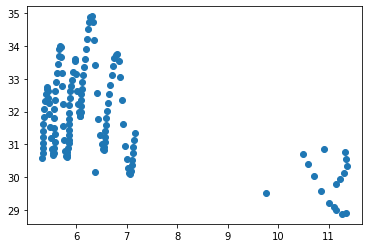

In [54]:
plt.scatter(SM_sensor1, ST_sensor1);

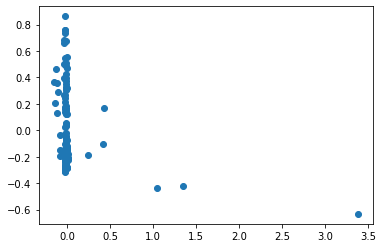

In [55]:
plt.scatter(S1_d1, S1_d2);